[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/neural_MLPRegressor.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223

In [89]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

fatal: destination path 'TCC2' already exists and is not an empty directory.


In [90]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2


In [91]:
ls

db.csv     LICENSE       NeuralNetwork_Simple_Test.ipynb
db_ok.csv  linear.ipynb  TCC2/


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [95]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [96]:
joinville.shape

(95, 6)

In [123]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [0]:
mydf = mydf.drop(['cidade'],axis=1) # Drop cidade feature
mydf = mydf.dropna(inplace=False)  # Remove all nan entries.


#mydf = mydf.drop(['Adj Close','Volume'],axis=1) # Drop Adj close and volume feature
mydf_train = mydf[:10]
mydf_test = mydf[10:]

In [125]:
df_joinville = mydf.drop(['3mm'], axis=1)
y = mydf['3mm']

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

((66, 4), (66,))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15000, ), random_state=1)

In [163]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

0.9973419369744306

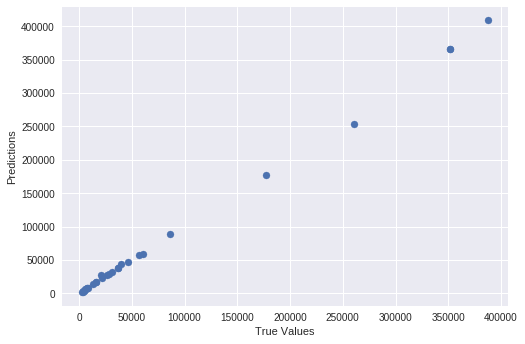

In [165]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

clf.score(X_test, y_test)